# KNN Classification


## Imports

In [1]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import utils
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from ucimlrepo import fetch_ucirepo
from joblib import dump, load
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, make_scorer, matthews_corrcoef, confusion_matrix, classification_report, ConfusionMatrixDisplay

c:\School\repositories\CSCI635\.conda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Import Dataset and Clean

In [2]:
covertype = fetch_ucirepo(id=31) 
  
X = covertype.data.features 
y = covertype.data.targets 

In [3]:
X_clean, y_clean = utils.clean_data(X, y)

X_train, X_test, y_train, y_test =  utils.split_data(X_clean, y_clean)
X_test

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
41804,2991,85,9,503,72,5124,233,225,124,5501,...,0,0,0,0,0,0,0,0,0,0
14445,3360,185,13,566,102,4468,222,249,158,2561,...,0,0,0,0,0,0,0,0,1,0
194721,3286,352,8,90,6,4097,206,226,158,1635,...,0,0,0,0,0,0,0,0,0,0
317944,2861,103,13,607,29,450,242,222,108,1170,...,0,0,0,0,0,0,0,0,1,0
166561,2834,97,9,108,13,1184,236,227,122,1832,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241604,2074,294,23,384,10,418,151,228,214,1025,...,0,0,0,0,0,0,0,0,0,1
407181,3120,281,11,182,0,1679,189,241,192,825,...,0,0,0,0,0,0,0,0,1,0
190419,3023,352,5,0,0,3129,211,231,158,361,...,0,0,0,0,0,0,0,0,0,0
60063,2858,248,5,30,0,3126,209,244,173,4052,...,0,0,0,0,0,0,0,0,0,0


## Model Testing and Evaluation

### No Sampling

In [9]:
X_train_scaled, X_test_scaled, y_train, y_test =  utils.scale_data(X_train, X_test, y_train, y_test)

In [13]:
mcc_scorer = make_scorer(matthews_corrcoef)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=34)

param_grid_knn = {"n_neighbors": [3, 5, 7, 11, 15], "weights": ["distance", "uniform"], "metric": ["minkowski", "euclidean"]}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, scoring=mcc_scorer, cv=cv, verbose=3)
grid_knn.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END metric=minkowski, n_neighbors=3, weights=distance;, score=0.885 total time=  27.7s
[CV 2/5] END metric=minkowski, n_neighbors=3, weights=distance;, score=0.888 total time=  29.8s
[CV 3/5] END metric=minkowski, n_neighbors=3, weights=distance;, score=0.888 total time=  29.1s
[CV 4/5] END metric=minkowski, n_neighbors=3, weights=distance;, score=0.888 total time=  29.2s
[CV 5/5] END metric=minkowski, n_neighbors=3, weights=distance;, score=0.886 total time=  30.2s
[CV 1/5] END metric=minkowski, n_neighbors=3, weights=uniform;, score=0.881 total time=  31.0s
[CV 2/5] END metric=minkowski, n_neighbors=3, weights=uniform;, score=0.883 total time=  29.0s
[CV 3/5] END metric=minkowski, n_neighbors=3, weights=uniform;, score=0.883 total time=  28.7s
[CV 4/5] END metric=minkowski, n_neighbors=3, weights=uniform;, score=0.884 total time=  30.1s
[CV 5/5] END metric=minkowski, n_neighbors=3, weights=uniform;, score=0.881 to

,estimator,KNeighborsClassifier()
,param_grid,"{'metric': ['minkowski', 'euclidean'], 'n_neighbors': [3, 5, ...], 'weights': ['distance', 'uniform']}"
,scoring,make_scorer(m...hod='predict')
,n_jobs,None
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,3


In [14]:
best_knn = grid_knn.best_estimator_
best_knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'distance'}

Test Accuracy: 0.9365076633133396
Test MCC: 0.8980095874682505

Confusion Matrix:
[[39616  2521     5     0    38     9   179]
 [ 2274 53841   156     0   214   155    21]
 [    3   155  6564    56    15   358     0]
 [    0     0    90   427     0    32     0]
 [   41   300    16     0  1525    17     0]
 [    7   146   324    27     7  2962     0]
 [  177    34     0     0     1     0  3890]]

Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.94      0.94     42368
           2       0.94      0.95      0.95     56661
           3       0.92      0.92      0.92      7151
           4       0.84      0.78      0.81       549
           5       0.85      0.80      0.82      1899
           6       0.84      0.85      0.85      3473
           7       0.95      0.95      0.95      4102

    accuracy                           0.94    116203
   macro avg       0.90      0.88      0.89    116203
weighted avg       0.94      0.94   

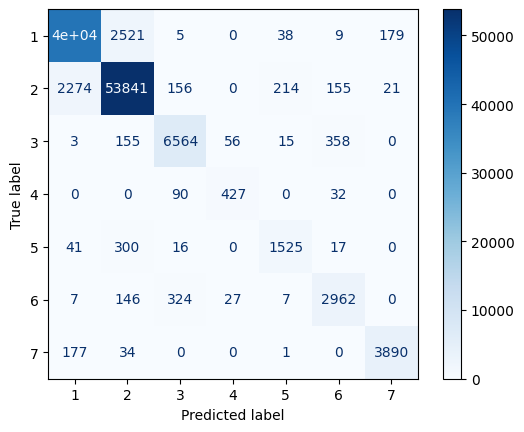

In [15]:
y_test_pred = grid_knn.predict(X_test_scaled)
utils.get_evaluations(y_test, y_test_pred)

In [16]:
dump(best_knn, "../data/best_knn.joblib")

['../data/best_knn.joblib']

In [ ]:
knn_model = load("../data/best_knn.joblib")

In [ ]:
y_test_pred = knn_model.predict(X_test_scaled)

print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

print("Test MCC:", matthews_corrcoef(y_test, y_test_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

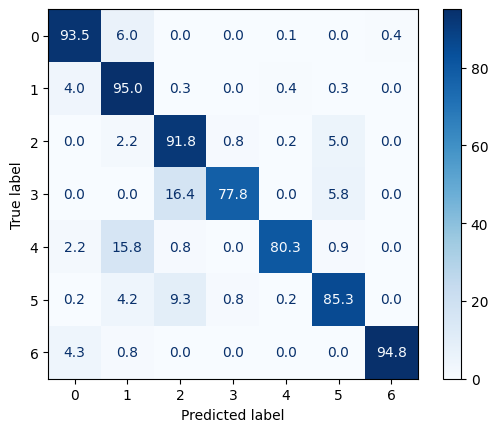

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred, normalize='true')  

cm_percent = cm * 100

disp = ConfusionMatrixDisplay(confusion_matrix=cm_percent)
disp.plot(cmap='Blues', values_format=".1f")

### SMOTE

In [13]:
X_train, X_test, y_train, y_test =  utils.split_data(X_clean, y_clean)
X_train_res, y_train_res = utils.normalize_data(X_train, y_train)

In [14]:
X_train_scaled, X_test_scaled, y_train, y_test =  utils.scale_data(X_train_res, X_test, y_train_res, y_test)

mcc_scorer = make_scorer(matthews_corrcoef)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=34)

param_grid_knn = {"n_neighbors": [3, 5, 7, 11, 15], "weights": ["distance", "uniform"], "metric": ["minkowski", "euclidean"]}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, scoring=mcc_scorer, cv=cv, verbose=3)
grid_knn.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END metric=minkowski, n_neighbors=3, weights=distance;, score=0.977 total time= 5.7min
[CV 2/5] END metric=minkowski, n_neighbors=3, weights=distance;, score=0.977 total time= 5.7min
[CV 3/5] END metric=minkowski, n_neighbors=3, weights=distance;, score=0.977 total time= 5.6min
[CV 4/5] END metric=minkowski, n_neighbors=3, weights=distance;, score=0.977 total time= 5.6min
[CV 5/5] END metric=minkowski, n_neighbors=3, weights=distance;, score=0.977 total time= 5.6min
[CV 1/5] END metric=minkowski, n_neighbors=3, weights=uniform;, score=0.975 total time= 5.7min
[CV 2/5] END metric=minkowski, n_neighbors=3, weights=uniform;, score=0.975 total time= 5.7min
[CV 3/5] END metric=minkowski, n_neighbors=3, weights=uniform;, score=0.975 total time= 5.7min
[CV 4/5] END metric=minkowski, n_neighbors=3, weights=uniform;, score=0.975 total time= 5.5min
[CV 5/5] END metric=minkowski, n_neighbors=3, weights=uniform;, score=0.975 to

,estimator,KNeighborsClassifier()
,param_grid,"{'metric': ['minkowski', 'euclidean'], 'n_neighbors': [3, 5, ...], 'weights': ['distance', 'uniform']}"
,scoring,make_scorer(m...hod='predict')
,n_jobs,None
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,3


Test Accuracy: 0.7217885940982591
Test MCC: 0.5652317217348923

Confusion Matrix:
[[27674 12703    82     0   797   390   722]
 [ 6755 44419  1930    44  1829  1609    75]
 [    0   190  5873   260    15   813     0]
 [    0     0   290   227     0    32     0]
 [   49   598   212     0   920   119     1]
 [    4   244  1537   115    12  1561     0]
 [  747   153     1     0     1     0  3200]]

Classification Report:
              precision    recall  f1-score   support

           1       0.79      0.65      0.71     42368
           2       0.76      0.78      0.77     56661
           3       0.59      0.82      0.69      7151
           4       0.35      0.41      0.38       549
           5       0.26      0.48      0.34      1899
           6       0.35      0.45      0.39      3473
           7       0.80      0.78      0.79      4102

    accuracy                           0.72    116203
   macro avg       0.56      0.63      0.58    116203
weighted avg       0.74      0.72   

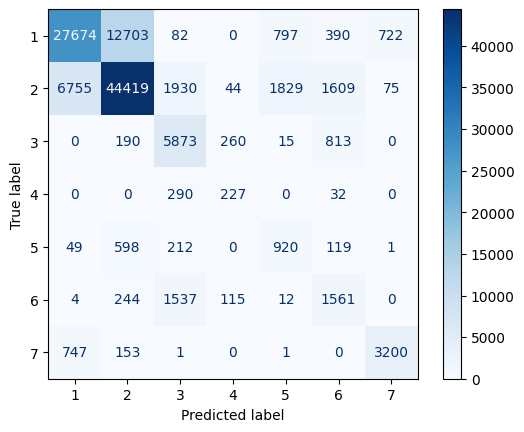

In [15]:
best_knn = grid_knn.best_estimator_
best_knn.get_params()

y_test_pred = grid_knn.predict(X_test_scaled)

print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

print("Test MCC:", matthews_corrcoef(y_test, y_test_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, cmap="Blues")
plt.show()

### Undersampling

In [5]:
X_train, X_test, y_train, y_test =  utils.split_data(X_clean, y_clean)
X_train_res, y_train_res = utils.normalize_data(X_train, y_train)
X_train_res_undersampled, y_train_res_undersampled = utils.naive_undersample_data(X_train_res, y_train_res)

In [8]:
mcc_scorer = make_scorer(matthews_corrcoef)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=34)
param_grid_knn = {"n_neighbors": [3, 5, 7, 11, 15], "weights": ["distance", "uniform"], "metric": ["minkowski", "euclidean"]}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, scoring=mcc_scorer, cv=cv, verbose=3)

In [ ]:
grid_knn.fit(X_train_res_undersampled, y_train_res_undersampled)